In [8]:
# 라이브러리 불러오기
import numpy as np # 수치계산용 라이브러리
import pandas as pd # 행과 열을 가지는 표와 같은 데이터를 다루는 라이브러리
import matplotlib.pyplot as plt # 시각화 라이브러리
import seaborn as sns # 시각화 라이브러리 (색감다양, 다양한 그래프 포함)
import warnings
warnings.filterwarnings('ignore')#경고 표시 안뜨게 
import matplotlib

# 한글 폰트 설정 (Windows: Malgun Gothic, Mac: AppleGothic)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False


In [11]:
a=pd.read_csv('../../data/Traffic_Accident_2017.csv',encoding='euc-kr')

In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           4065 non-null   int64  
 1   발생년월일시        4065 non-null   int64  
 2   발생분           4065 non-null   int64  
 3   주야            4065 non-null   object 
 4   요일            4065 non-null   object 
 5   사망자수          4065 non-null   int64  
 6   사상자수          4065 non-null   int64  
 7   중상자수          4065 non-null   int64  
 8   경상자수          4065 non-null   int64  
 9   부상신고자수        4065 non-null   int64  
 10  발생지시도         4065 non-null   object 
 11  발생지시군구        4065 non-null   object 
 12  사고유형_대분류      4065 non-null   object 
 13  사고유형_중분류      4065 non-null   object 
 14  사고유형          4065 non-null   object 
 15  법규위반_대분류      4065 non-null   object 
 16  법규위반          4065 non-null   object 
 17  도로형태_대분류      4065 non-null   object 
 18  도로형태          4065 non-null 

In [14]:
a.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
3,2017,2017010102,22,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,961608,1864573,127.069759,36.778505
4,2017,2017010104,37,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,946778,1941695,126.898094,37.472946


In [18]:
pd.set_option('display.max_columns',None)

In [22]:
pd.reset_option('display.max_columns')

In [23]:
a

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
3,2017,2017010102,22,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,961608,1864573,127.069759,36.778505
4,2017,2017010104,37,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,946778,1941695,126.898094,37.472946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,2017,2017123118,10,야간,일,1,4,1,0,2,...,단일로,기타단일로,화물차,화물차,화물차,화물차,1044531,1682838,127.988833,35.139774
4061,2017,2017123118,25,야간,일,1,1,0,0,0,...,단일로,기타단일로,원동기장치자전거,원동기장치자전거,없음,없음,1160683,1704380,129.267745,35.322087
4062,2017,2017123119,55,야간,일,1,1,0,0,0,...,단일로,기타단일로,화물차,화물차,없음,없음,1067639,1980346,128.268522,37.820351
4063,2017,2017123120,40,야간,일,1,11,1,9,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,961004,1987481,127.056525,37.886331


요일별 사고 건수 시각화

In [36]:
c=a['요일'].value_counts()
c=c.loc[['월','화','수','목','금','토','일']]

<Axes: xlabel='요일'>

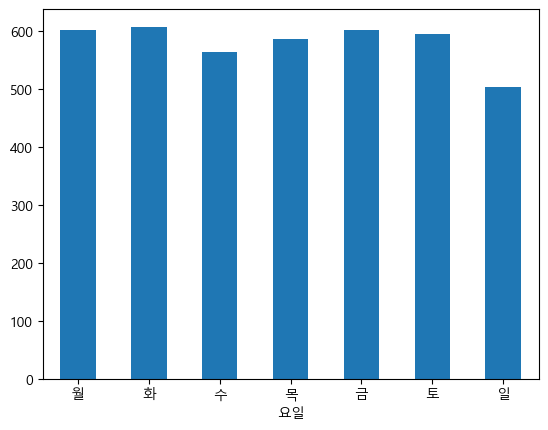

In [37]:
c.plot(kind='bar', rot=0)

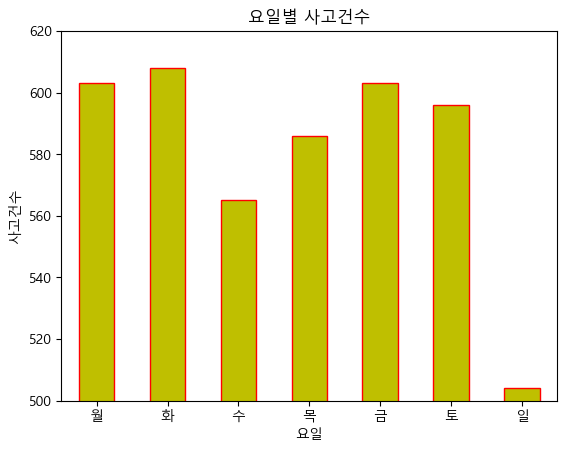

In [41]:


# 1. 그래프 그리기 (옵션 설정)
c.plot(kind='bar', 
       color='y',          # 막대 내부 색상 (yellow)
       edgecolor='r',      # 막대 테두리 색상 (red)
       ylim=(500, 620),    # y축 범위 설정 (데이터 차이 부각)
       rot=0)              # x축 글자 회전 (가로로 똑바로)

# 2. 제목 및 라벨 설정
plt.title('요일별 사고건수')   # 그래프 제목
plt.xlabel('요일')            # x축 이름
plt.ylabel('사고건수')        # y축 이름

plt.show()

In [53]:
x=c.index
y=c.values
y

array([603, 608, 565, 586, 603, 596, 504])

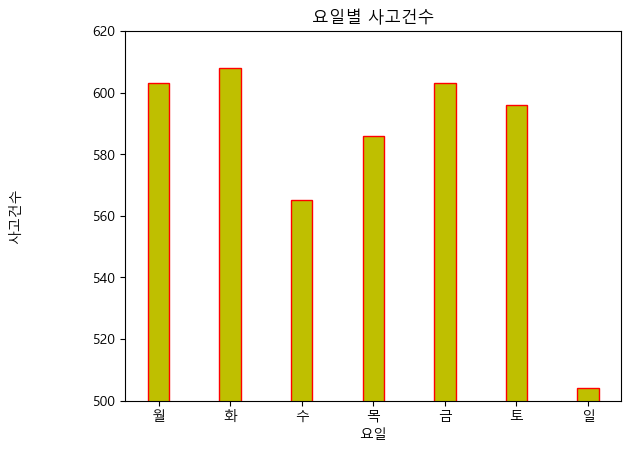

In [60]:
plt.bar(x,y,width=0.3, edgecolor='r',color='y')           
plt.ylim(500, 620)
plt.xlabel("요일")
plt.ylabel("사고건수",labelpad=50)
plt.title("요일별 사고건수")
plt.show()

### 사고 유형중 차대차 사건중 죽거나 다친사람이 많은 발생지시도를 알아보고시각화해보자!

In [77]:
d=a[a['사고유형_대분류']=='차대차'].groupby('발생지시도')['사상자수'].sum()
d

발생지시도
강원    214
경기    824
경남    248
경북    287
광주     87
대구    115
대전     61
부산    107
서울    197
세종     17
울산     73
인천     66
전남    298
전북    244
제주     50
충남    351
충북    261
Name: 사상자수, dtype: int64

In [86]:
x=d.index
y=d.values
print(x.shape,y.shape)

(17,) (17,)


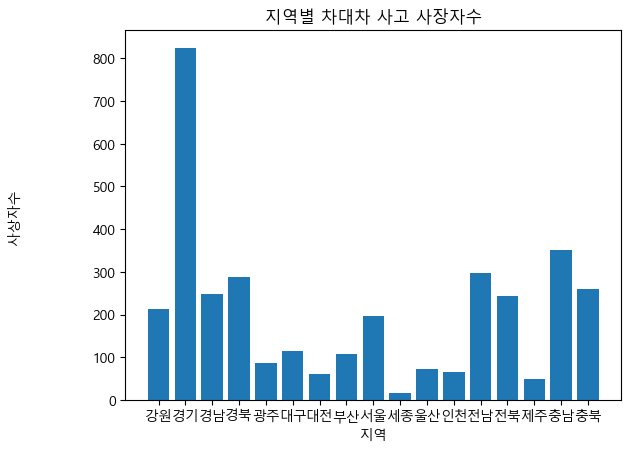

In [82]:
plt.bar(x,y)           

plt.xlabel("지역")
plt.ylabel("사상자수 ",labelpad=50)
plt.title("지역별 차대차 사고 사장자수")
plt.show()